In [153]:
import numpy as np
import matplotlib.pyplot as plt
from nearest_neighbour import learnknn, predictknn, gensmallm
data = np.load('mnist_all.npz', allow_pickle=True)

In [ ]:
imgs = []
for i in range(10):
    imgs.append(data[f'train{i}'][0].reshape(28,28))
    plt.figure(figsize = (3,0.6))
    plt.axis('off')
    plt.imshow(imgs[i], cmap='gray')

In [191]:
labels = [2,3,5,6]
train_sampels = [data[f"train{i}"] for i in labels]
test_sampels = np.concatenate([data[f"test{i}"] for i in labels])
test_lables = np.concatenate([np.full(data[f"test{val}"].shape[0], val) for val in labels]).reshape(-1, 1)
np.concatenate(test_sampels)

def get_avg_err(m):
    print(f"m={m}")
    err = 0
    for i in range(10):
        (X, Y) = gensmallm(train_sampels, labels, m)
        classifier = learnknn(1, X, Y)
        predicted = np.array([classifier(sample) for sample in test_sampels]).reshape(-1, 1)
        err += np.mean(test_lables != predicted)

    return err/10


m=10
m=20
m=30
m=40
m=50
m=60
m=70
m=80
m=90
m=100


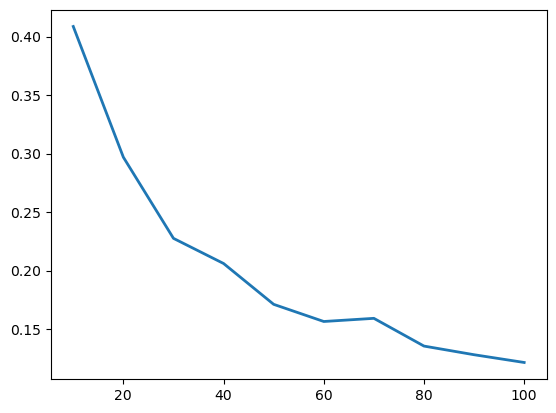

In [199]:
sample_size = np.arange(10, 110,10)
err = [get_avg_err(m) for m in sample_size]
fig, ax = plt.subplots()

ax.plot(sample_size, err, linewidth=2.0)

# ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#        ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()
